# Example 1: Bayesian Network

## Introduction
In this example, we will use `pgmpy` library to construct a Bayesian network then utilize the network in some AI tasks.
The structure of our Bayesian network is depicted in the following figure:

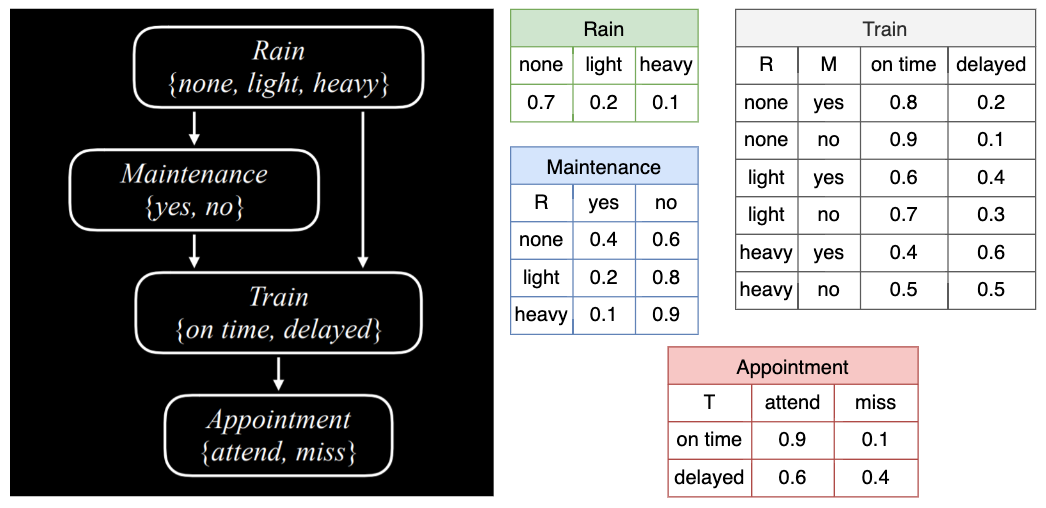

We will start with installing the `pomegranate` library:

## Install pgmpy library

In [1]:
# Install requirements
! pip install pgmpy

## Create network nodes and network structure

In [2]:
from pgmpy.models import DiscreteBayesianNetwork 

# Our Empty Bayesian Network
model = DiscreteBayesianNetwork()

# Picking Our Variables
model.add_node('Rain')
model.add_node('Maintenance')
model.add_node('Train')
model.add_node('Appointment')

model.add_edge('Rain', 'Maintenance')
model.add_edge('Rain', 'Train')
model.add_edge('Maintenance', 'Train')
model.add_edge('Train', 'Appointment')


d:\Work\HANU\TA_AIN\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Or we can use the following code to quickly define the structure of our BayesianNetwork

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork 

model = DiscreteBayesianNetwork([
   ('Rain', 'Maintenance'),
   ('Rain', 'Train'),
   ('Maintenance', 'Train'),
   ('Train', 'Appointment')
])

## Define node's probability tables
We use `TabularCPD` class to define the probability tables, so we should import `TabularCPD` from `pgmpy.factors.discrete` package




### Define the probability table for `Rain` node
We start defining the probability table for the `Rain` node in our network. It is the root node of the network, so there is no dependence in the probability table of the `Rain` node.
The properties of the `TabularCPD` class are:
* `variable`: name of the variable (the label of the node). In this case, the `variable` is `'Rain'`.
* `variable_card`: numbers of states of the node. In this case, the node `Rain` has three states: `'none'`, `'light'`, and `'heavy'`, so the `variable_card` is `3`.
* `state_names`: a dictionary contains the label of each state of the node. In this case, `state_names` is `{'Rain' : ['none', 'light', 'heavy']}`
* `values`: a nested list of probability values corresponding to each state of the node. Each item in the outer list is actually an inner list, that represents the probability of a state of the node. In this case, each state of the node `Rain` has only one probabily, so the `values` is: `[[0.7],[0.2],[0.1]]`

You can use `print` function to print out the content of the probability table.

In [ ]:
from pgmpy.factors.discrete import TabularCPD

cpd_Rain = TabularCPD(
    variable='Rain', variable_card=3,
    state_names={'Rain': ['none', 'light', 'heavy']},
    values=[[0.7], [0.2], [0.1]]
)
print(cpd_Rain)


### Define the probability table for `Maintenance` node
We continue defining the probability table for the `Maintenance` node in our network. The parent node of the `Maintenance` node is the `Rain` node. It means the probability distribution of `Maintenance` depend on the state of `Rain`.

The properties of the `TabularCPD` class are:
* `variable`: in this case, the `variable` is `'Maintenance'`.
* `variable_card`: The node `Maintenance` has two states: `'yes'`, and `'no'`, so the `variable_card` is `2`.
* `evidence`: a list of variables that are the parent node of the current node in the network. In this case, the node `Maintenance` has one father node, `Rain`, so the `evidence` is: `['Rain']`.
* `evidence_card`: a list contains the number of states of the parent nodes of the current node. In this case, the node has one father node. The father node `Rain` has three states, so the `evidence_card` is: `[3]`
* `state_names`: a dictionary contains the label of each state of the node and the parent nodes. In this case, `state_names` is `{'Rain' : ['none', 'light', 'heavy'], 'Maintenance' : ['yes', 'no']}`
* `values`: a nested list of probability values corresponding to each state of the node. Each item in the outer list is actually an inner list, that represents the probability of a state of the node. In this case, the probability distribution of `Maintenance` depend on the three states of `Rain`, so the `values` is: `[[0.4, 0.2, 0.1],[0.6, 0.8, 0.9]]`

You can use `print` function to print out the content of the probability table.

In [ ]:
cpd_Maintenance = TabularCPD(
    variable='Maintenance', variable_card=2,
    evidence=['Rain'], evidence_card=[3],
    state_names={
        'Rain': ['none', 'light', 'heavy'],
        'Maintenance': ['yes', 'no']
    },
    values=[[0.4, 0.2, 0.1],[0.6, 0.8, 0.9]]
)
print(cpd_Maintenance)

### Define the probability table for `Train` node
We continue defining the probability table for the `Train` node in our network. The parent nodes of the `Train` node are the `Rain` and `Maintenance` node. It means the probability distribution of `Train` depend on the state of `Rain` and `Maintenance`.

The properties of the `TabularCPD` class are:
* `variable`: in this case, the `variable` is `'Train'`.
* `variable_card`: The node `Train` has two states: `'on time'`, and `'delayed'`, so the `variable_card` is `2`.
* `evidence`: a list of variables that are the parent node of the current node in the network. In this case, the node `Train` has two father nodes, `Rain` and `Maintenance`, so the `evidence` is: `['Rain', 'Maintenance']`.
* `evidence_card`: a list contains the number of states of the parent nodes of the current node. In this case, the node has two father nodes. The node `Rain` has three states and has `Maintenance` two states, so the `evidence_card` is: `[3, 2]`.
* `state_names`: a dictionary contains the label of each state of the node and the parent nodes. In this case, `state_names` is: `{'Rain' : ['none', 'light', 'heavy'], 'Maintenance' : ['yes', 'no'], 'Train' : ['on time', 'delayed']}`
* `values`: a nested list of probability values corresponding to each state of the node. Each item in the outer list is actually an inner list, that represents the probability of a state of the node. In this case, the probability distribution of `Train` depend on the state of `Rain` and `Maintenance`, so the `values` is: `[[0.8, 0.9, 0.6, 0.7, 0.4, 0.5],[0.2, 0.1, 0.4, 0.3, 0.6, 0.5]]`

You can use `print` function to print out the content of the probability table.

In [ ]:
cpd_Train = TabularCPD(
    variable='Train', variable_card=2,
    evidence=['Rain', 'Maintenance'], evidence_card=[3, 2],
    state_names={
        'Rain': ['none', 'light', 'heavy'],
        'Maintenance': ['yes', 'no'],
        'Train': ['on time', 'delayed']
    },
    values=[[0.8, 0.9, 0.6, 0.7, 0.4, 0.5],[0.2, 0.1, 0.4, 0.3, 0.6, 0.5]]
)
print(cpd_Train)

The `cpd_Train` has many collumn, the table content has been truncated to save some space.

We will create a new printing function named print_full(cpd) to print out all columns of the table:

In [ ]:
def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

print_full(cpd_Train)

### Define the probability table for `Appointment` node
The last probability table for the `Appointment` node could be defined in the same way with the previous nodes.

In [ ]:
cpd_Appointment = TabularCPD(
    variable='Appointment', variable_card=2,
    evidence=['Train'], evidence_card=[2],
    state_names={
        'Train': ['on time', 'delayed'],
        'Appointment': ['attend', 'miss']
    },
    values=[[0.9, 0.6],[0.1, 0.4]]
)
print(cpd_Appointment)

## Associate the probability tables with the network


In [ ]:
# Associating the CPDs with the network
model.add_cpds(cpd_Rain, cpd_Maintenance, cpd_Train, cpd_Appointment)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

### Visualize the network

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Plot the model
nx.draw_circular(model, node_color='#00b4d9', with_labels=True)
plt.draw()

## Inference with Bayesian network


We could use the network that we've set up to make predictions or answer questions.

We call this “inference". In general, we can perform two tasks when inferencing with a Bayesian network:
* Finding probabilites: Answer probability queries over the network given some other variables.
* Predicting value of a variable: Get the most probable state of a variable given some other variables.

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

### Finding Probabilities


We can ask our Bayesian network to find the probability of something happening.

For instance, if we want to know the probability distribution of `Appointment` when `Rain` is `heavy`, we can perform inference in the network:

In [ ]:
prob = inference.query(['Appointment'], evidence={'Rain' : 'heavy'})
print(prob)

Or the probability distribution of `Appointment` when `Rain` is `none` and `Maintenance` is `no`:

In [ ]:
prob = inference.query(['Appointment'], evidence={'Rain' : 'none', 'Maintenance' : 'no'})
print(prob)

In other example, we observed that the train was delayed, and we want to know the probability distribution of other variables in the network such as: `Rain`, `Maintenance`, and `Appointment`:

In [ ]:
# Create a list of variables
variables = ['Rain', 'Maintenance', 'Appointment']

# Create an evidence object
evidence = {'Train' : 'delayed'}

# Query for the probability distribution of each variable in the list
for var in variables:
  prob = inference.query([var], evidence)
  print(prob)


### Predicting a value

Predicting value of a variable given some other variables is quite similar to computing the conditional probabilities.

We need to query for the variable that we need to predict given all the other features.

The only difference is that rather than getting the probabilitiy distribution we are interested in getting the most probable state of the variable.

In `pgmpy`, we use `map_query()` for predicting a value.

For example, we observed that the track is maintained (`Maintenance` = `yes`), and we want to know what are most probable values of all other nodes in the network:

In [ ]:
# Create a list of variables
variables = ['Rain', 'Train', 'Appointment']

# Create an evidence object
evidence = {'Maintenance' : 'yes'}

# Predict the value of each variable in the list
for var in variables:
  prob = inference.map_query([var], evidence)
  print(prob)

## Approximate Inference

Exact inference in Bayesian Networks is often computationally impractical for large or complex networks due to the exponential growth of computational requirements.

Approximate inference methods provide a feasible alternative, offering probabilistic estimates with significantly reduced computational costs.

Sampling is one technique of approximate inference. In sampling, each variable is sampled for a value according to its probability distribution.

In `pgmpy`, we can perform approximate inference with `BayesianModelSampling` class.

Let's consider an example, where we observed that the train was delayed, and we want to approximate the probability distribution of other variables in the network such as: `Rain`, `Maintenance`, and `Appointment`.

Firstly, we create an object `inference` object from the `BayesianModelSampling` class.

Then we create the `evidence` object that contains the given evidence. Because we will use a different inference method, so the `evidence` object must be created from the `State` class.

Then we call `rejection_sample()` method with the `evidence` and `size = 10000` to create `sampleTable` which has `10000` sample values.

By counting how many times each value of the variable appeared in the `sampleTable`, we could have the approximation of the probability distribution of the variables in the network.

The following is the example code for approximate inference:

In [ ]:
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling

inference = BayesianModelSampling(model)

# Create an evidence object
evidence = [State(var='Train', state='delayed')]

sampleTable = inference.rejection_sample(evidence=evidence, size=10000)

print(sampleTable)
print("=========================================")

# Approximate the probability distribution of 'Rain'
rainTable = sampleTable['Rain'].value_counts()
print(rainTable)
print("=========================================")

# Approximate the probability distribution of 'Rain'
maintenanceTable = sampleTable['Maintenance'].value_counts()
print(maintenanceTable)
print("=========================================")

# Approximate the probability distribution of 'Rain'
appointmentTable = sampleTable['Appointment'].value_counts()
print(appointmentTable)


# Example 2: Markov Model

## Introduction

A Markov chain is a sequence of random variables where the distribution of each variable follows the Markov assumption.

That is, each event in the chain occurs based on the probability of the event before it.

In this example, we will create a simple weather forecast agent. The `weather` variable has two states, `'sun'` and `'rain'`.

To start constructing a Markov chain, we need a transition matrix that will specify the the probability distributions of the next event based on the possible values of the current event.

In this example, the probability of tomorrow being sunny based on today being sunny is 0.8. This is reasonable, because it is more likely than not that a sunny day will follow a sunny day.

However, if it is rainy today, the probability of rain tomorrow is 0.7, since rainy days are more likely to follow each other.

The transition matrix of the variable `weather` is:

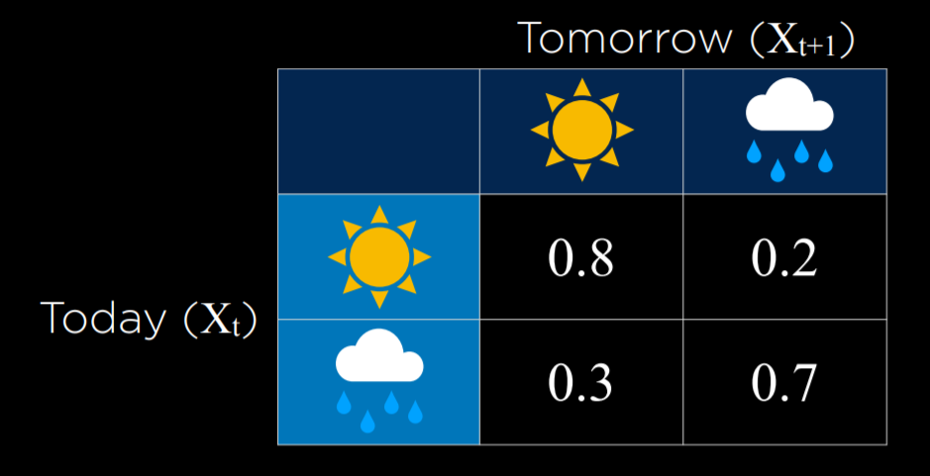

Using this transition model, it is possible to sample a Markov chain.

Start with a day being either rainy or sunny, and then sample the next day based on the probability of it being sunny or rainy given the weather today.

Then, condition the probability of the day after tomorrow based on tomorrow, and so on, resulting in a Markov chain:

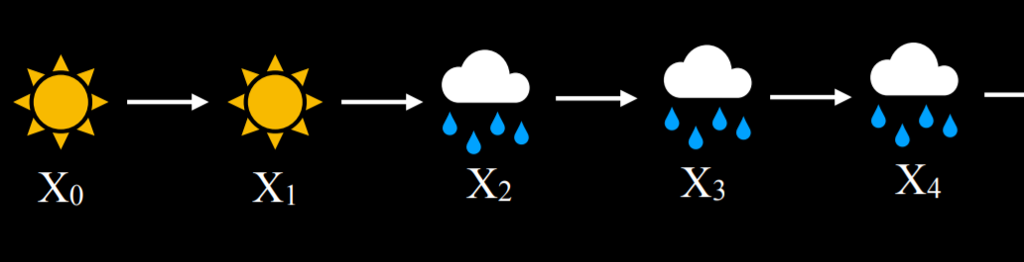

## Create a Markov Chain model

In pgmpy, we could create a Markov chain model by using `MarkovChain` class. So we will import the `MarkovChain` class from `pgmpy.models`

We also import `State` class from `pgmpy.factors.discrete` to define the start state of the model.

In [ ]:
from pgmpy.models import MarkovChain
from pgmpy.factors.discrete import State

To create a Markov chain model, we should provide a list of variables and a list of the number of states of each variable.

In our example, the model has one variable, `weather`, and this variable has two states, `'sun'` and `'rain'`.

Because the MarkovChain class requires the integer index of variable's state, so we define a `stateLable` dictionary to map between the interger index and the state's label. In this case, `0` is `'sun'` and `1` is `'rain'`.

In [ ]:
model = MarkovChain(['weather'], [2])

stateLabel = {0 : 'sun',
              1 : 'rain'}

Now we will define the transition matrix for the variable `weather`. The transition matrix specifies the the probability distributions switching from current state to the next state in the chain.

The `transition` is linked to the model by function `add_transition_model()`:

In [ ]:
transitions = {0: {0: 0.8, 1: 0.2},
               1: {0: 0.3, 1: 0.7}}

model.add_transition_model('weather', transitions)

The next step is to set the starting state of the model. In our example, we will create a varibale named `start` and set the starting state of the model to the `start`.

In [ ]:
start = [State('weather', 0)]

model.set_start_state(start)

Now we finish setting up the model. And we can execute `sample()` function to create a series of prediction values.

We want to predict the weather in 20 days in a row, so we set the value of keyword argument `size` to `20`.

`sample()` function will return a pandas dataframe, `seriesData`. We can loop for each row of `seriesData` and print out the row content. The `stateLabel` could be used to print out the corresponding lable of the state integer index.

In [ ]:
seriesData = model.sample(size = 20)

for index, row in seriesData.iterrows():
  print(stateLabel[row['weather']], end = " ")

# Example 3: Hidden Markov Model

## Introduction

The hidden Markov Model (HMM) is a statistical model that is used to describe the probabilistic relationship between a sequence of observations and a sequence of hidden states.

It is often used in situations where some hidden states generate some observed event.

An HMM consists of two types of variables: hidden states and observations.
* The hidden states are the underlying variables that generate the observed data, but they are not directly observable.
* The observations are the variables that are measured and observed.

The relationship between the hidden states and the observations is modeled using a probability distribution. There are two sets of probabilities: the transition probabilities (transition matrix) and the emission probabilities (emission matrix).
* The transition matrix describes the probability of transitioning from one hidden state to another.
* The emission matrix describe the probability of observing an output given a hidden state.

For example, if it is sunny, it is most probable that people will not bring umbrellas to the building. If it is rainy, then it is very likely that people bring umbrellas to the building.

By using the observation of whether people brought an umbrella or not, we can predict with reasonable likelihood what the weather is outside.

In this case, the hidden variable is weather which have two states: `sun` or `rain`. The observation variable states are: `umbrella` and `no umbrella`:

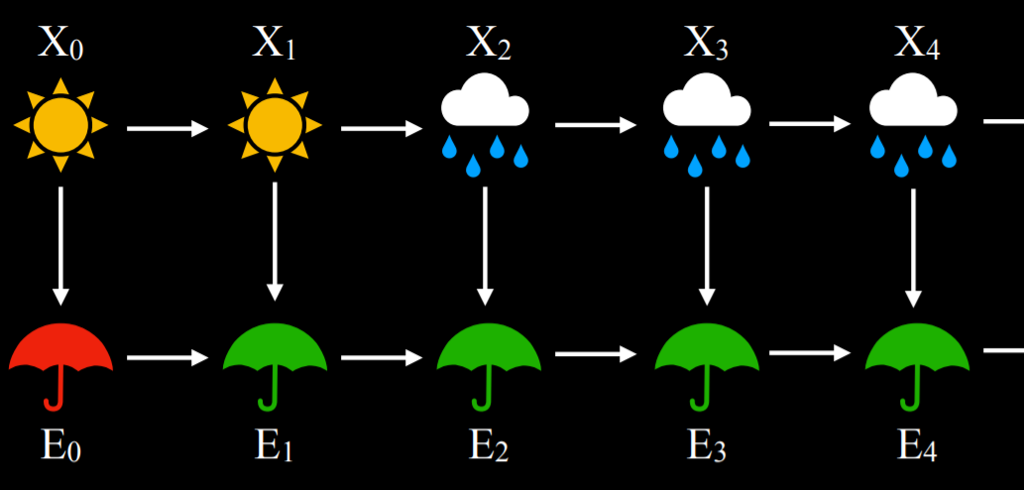

For the hidden states variable, we use the same transition matrix in Example 2:

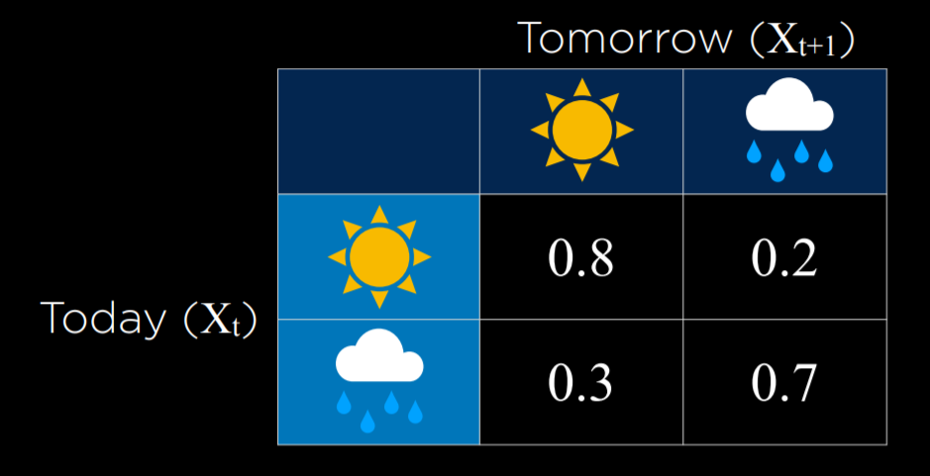

The emission matrix is presented in the following figure:

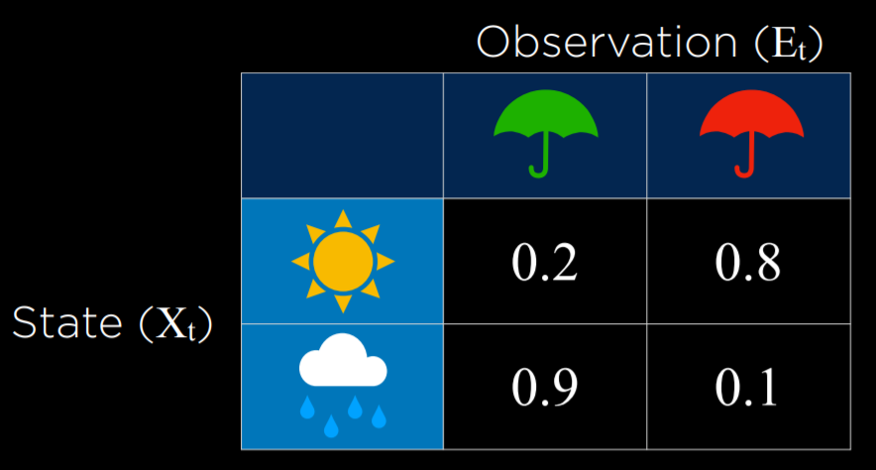

## Create a Hidden Markov Model

### Install hmmlearn package

We will use `hmmlearn` package to help creating HMM. The following code will install `hmmlearn` package:

In [ ]:
# Install requirements
!pip install hmmlearn

### Define a HMM model

We will define the following:
* List of hidden state labels: `states`
* List of observations labels: `observations`
* Transition matrix: `transitions`. Because `hmmlearn` don't support text labels, so we define the `transitions` as a numpy array.
* Emission matrix: `emissions` as a numpy array.
* Starting probabilities of the hidden states: `starts`

In [ ]:
import numpy as np
from hmmlearn import hmm

states = ['sun', 'rain']
observations = ['umbrella', 'no umbrella']

# Transition matrix
transitions = np.array(
    [[0.8, 0.2], # Tomorrow's predictions if today = sun
     [0.3, 0.7]] # Tomorrow's predictions if today = rain
)

# Emission matrix
emissions = np.array(
    [[0.2, 0.8],    # Probability distribution of observation if today = sun
     [0.9, 0.1]]    # Probability distribution of observation if today = rain
)

# Starting probabilities
starts = np.array([0.5, 0.5])


Now we can create a HMM model by using the class `CategoricalHMM`.

The number of variables in our `model` is `2` (one hidden state variable and one observation variable), so we set the keyword argument `n_components` to `2`.

In our `model`, we set the following parameters:
* `startprob_` : starting probabilities
* `transmat_` : transition matrix
* `emissionprob_` : emission matrix

In [ ]:
# Create the HMM model
model = hmm.CategoricalHMM(n_components=2)
model.startprob_ = starts
model.transmat_ = transitions
model.emissionprob_ = emissions

We also define an observation sequence:
In `hmmlearn`, a sequence of observations is defined as a one-dimensional NumPy array.

The observed data is defined as `new_obs_seq` which is a sequence of integers, representing the index of corresponding observation in the observations list:

In [ ]:
# Define an observation sequence
new_obs_seq = np.array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0]).reshape(-1, 1)

Finally, the most likely sequence of hidden states that generated the observations is computed using the `predict()` method of the HMM model:

In [ ]:
state_pred = model.predict(new_obs_seq)
print("Predicted hidden state sequence:")
for st in state_pred:
  print(states[st], end=" ")

# Exercise 1: Bayesian Network - Admission system

## Introduction

In this exersice, we will design a bayesian network to model student's admission result.

The following diagram represent our network:

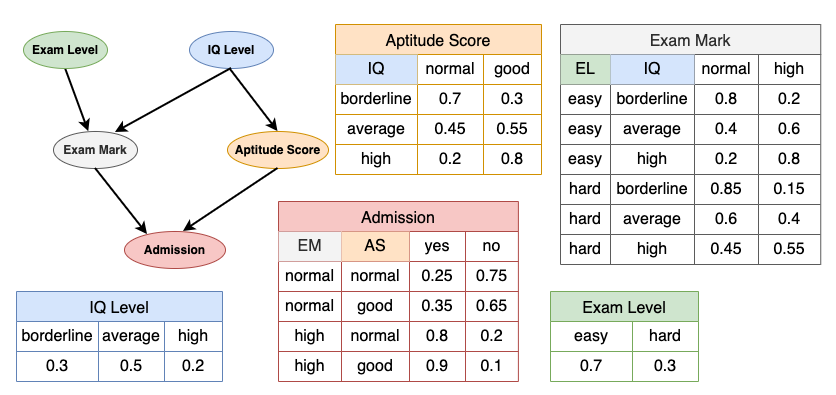

Our Bayesian network has five nodes:
* `Exam Level`: This variable denotes the difficulty of the entrance exam and has two values: `easy` and `hard`. It is one of two root nodes of the network.
* `IQ Level`: This variable represents the Intelligence Quotient level of the student and has three values: `borderline`, `average` and `high`. It is one of two root nodes of the network.
* `Aptitude Score`: This variable denotes the student's score of the aptitude test. It has two values: `normal` and `good`. The probability distribution of this variable depends on the `IQ Level`.
* `Exam Mark`: This variable represents the student's mark of the entrance exam. It has two values: `normal` and `high`. The probability distribution of this variable depends on both the `Exam Level` and the `IQ Level`.
* Admission: This variable denotes the student's admission result. It has two values: yes and no. The probability distribution of this variable depends on both the `Exam Mark` and the `Aptitude Score`.


## Questions

Construct the Bayesian network above using `pgmpy` library. The perform the following AI task on the network:
* Finding probabilities
  * Show the probability distribution of `Admission` when `IQ Level` is `average`.
  * Show the probability distribution of all variable when `Aptitude Score` is `good`.
* Predicting a value:
  * We observed that the `Exam Mark` is `normal`, what are most probable values of all other nodes in the network?.


## Code

In [3]:
# Exercise 1: Bayesian Network - Admission system
from pgmpy.models import DiscreteBayesianNetwork 
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Defining the model structure
model = DiscreteBayesianNetwork ([('Exam Level', 'Exam Mark'),
                           ('IQ Level', 'Exam Mark'),
                           ('IQ Level', 'Aptitude Score'),
                           ('Exam Mark', 'Admission'),
                           ('Aptitude Score', 'Admission')])

# Defining individual CPDs.
cpd_exam_level = TabularCPD(variable='Exam Level', variable_card=2,
                            values=[[0.7], [0.3]],
                            state_names={'Exam Level': ['easy', 'hard']})

cpd_iq_level = TabularCPD(variable='IQ Level', variable_card=3,
                          values=[[0.5], [0.3], [0.2]],
                          state_names={'IQ Level': ['borderline', 'average', 'high']})

cpd_aptitude_score = TabularCPD(variable='Aptitude Score', variable_card=2,
                                values=[[0.8, 0.6, 0.2],
                                        [0.2, 0.4, 0.8]],
                                evidence=['IQ Level'],
                                evidence_card=[3],
                                state_names={'Aptitude Score': ['normal', 'good'],
                                             'IQ Level': ['borderline', 'average', 'high']})

cpd_exam_mark = TabularCPD(variable='Exam Mark', variable_card=2,
                           values=[[0.8, 0.6, 0.9, 0.7, 0.95, 0.8],
                                   [0.2, 0.4, 0.1, 0.3, 0.05, 0.2]],
                           evidence=['Exam Level', 'IQ Level'],
                           evidence_card=[2, 3],
                           state_names={'Exam Mark': ['normal', 'high'],
                                        'Exam Level': ['easy', 'hard'],
                                        'IQ Level': ['borderline', 'average', 'high']})

cpd_admission = TabularCPD(variable='Admission', variable_card=2,
                           values=[[0.9, 0.6, 0.7, 0.3],
                                   [0.1, 0.4, 0.3, 0.7]],
                           evidence=['Exam Mark', 'Aptitude Score'],
                           evidence_card=[2, 2],
                           state_names={'Admission': ['no', 'yes'],
                                        'Exam Mark': ['normal', 'high'],
                                        'Aptitude Score': ['normal', 'good']})

# Associating the CPDs with the network
model.add_cpds(cpd_exam_level, cpd_iq_level, cpd_aptitude_score, cpd_exam_mark, cpd_admission)

# Verifying the model
assert model.check_model()

# Performing inference
inference = VariableElimination(model)

# 1. Probability distribution of Admission when IQ Level is average
prob_admission_avg_iq = inference.query(variables=['Admission'], evidence={'IQ Level': 'average'})
print("Probability distribution of Admission when IQ Level is average:")
print(prob_admission_avg_iq)

# 2. Probability distribution of all variables when Aptitude Score is good
print("\nProbability distribution of all variables when Aptitude Score is good:")
for var in model.nodes():
    if var != 'Aptitude Score':
        prob = inference.query(variables=[var], evidence={'Aptitude Score': 'good'})
        print(f"\nVariable: {var}")
        print(prob)

# 3. Most probable values of all other nodes when Exam Mark is normal
print("\nMost probable values of all other nodes when Exam Mark is normal:")
map_query_result = inference.map_query(variables=list(set(model.nodes()) - {'Exam Mark'}), evidence={'Exam Mark': 'normal'})
print(map_query_result)

Probability distribution of Admission when IQ Level is average:
+----------------+------------------+
| Admission      |   phi(Admission) |
+================+==================+
| Admission(no)  |           0.7092 |
+----------------+------------------+
| Admission(yes) |           0.2908 |
+----------------+------------------+

Probability distribution of all variables when Aptitude Score is good:

Variable: Exam Level
+------------------+-------------------+
| Exam Level       |   phi(Exam Level) |
+==================+===================+
| Exam Level(easy) |            0.7000 |
+------------------+-------------------+
| Exam Level(hard) |            0.3000 |
+------------------+-------------------+

Variable: Exam Mark
+-------------------+------------------+
| Exam Mark         |   phi(Exam Mark) |
+===================+==================+
| Exam Mark(normal) |           0.7916 |
+-------------------+------------------+
| Exam Mark(high)   |           0.2084 |
+-------------------+-

0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'Admission': 'no', 'Exam Level': 'easy', 'Aptitude Score': 'normal', 'IQ Level': 'borderline'}


# Exercise 2: Markov Model - Bicycles share program

About 600 cities worldwide have bike share programs. Typically a person pays a fee to join a the program and can borrow a bicycle from any bike share station and then can return it to the same or another system.

Each day, the distribution of bikes at the stations changes, as the bikes get returned to different stations from where they are borrowed.

Let's consider a very simple bike share program with only 3 stations: A, B, C. Suppose that all bicycles must be returned to the station at the end of the day, we want to model the movement of bikes from the end of a given day to then end of the next day.

We find that over a 1 day period:

* of the bikes borrowed from station A, 30% are returned to station A, 50% end up at station B, and 20% end up at station C.
* of the bikes borrowed from station B, 10% end up at station A, 60% have been returned to station B, and 30% end up at station C.
* of the bikes borrowed from station C, 10% end up at station A, 10% end up at station B, and 80% are returned to station C.

The above probabilities are visualized as a state diagram and a transition matrix:

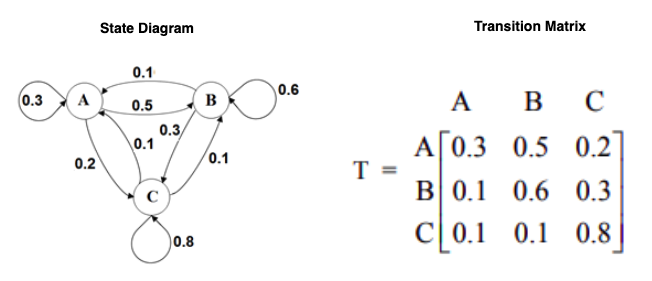

Create a Markov chain model to predict the movement of bikes from the station A after 30 days.

## Code

In [4]:
# Exercise 2: Markov Model - Bicycles share program
import numpy as np

# Define the transition matrix
# Order of states: A, B, C
T = np.array([
    [0.3, 0.5, 0.2],  # From A
    [0.1, 0.6, 0.3],  # From B
    [0.1, 0.1, 0.8]   # From C
])

# Define the initial state vector
# Starts at station A
initial_state = np.array([1, 0, 0])

# Calculate the state distribution after 30 days
# We need to compute T^30 * initial_state
# A more efficient way is to compute T^30 and then multiply by the initial state.
# For matrix power, we can use np.linalg.matrix_power
T_30 = np.linalg.matrix_power(T.T, 30) # We use T.T because we are dealing with state vectors as rows
final_state_distribution = np.dot(initial_state, T_30)

print("Transition Matrix:")
print(T)
print("\nInitial state (starting at A):")
print(initial_state)
print("\nState distribution after 30 days:")
print(f"P(A) = {final_state_distribution[0]}")
print(f"P(B) = {final_state_distribution[1]}")
print(f"P(C) = {final_state_distribution[2]}")

# This shows the probability of a bike starting at station A being at station A, B, or C after 30 days.
# To predict the movement, we can say the bike is most likely to be at the station with the highest probability.
most_likely_station_index = np.argmax(final_state_distribution)
stations = ['A', 'B', 'C']
print(f"\nThe bike is most likely to be at station {stations[most_likely_station_index]} after 30 days.")

# The final distribution is actually the stationary distribution of the Markov chain.
# Let's find the stationary distribution by finding the eigenvector corresponding to eigenvalue 1.
eigenvalues, eigenvectors = np.linalg.eig(T.T)
stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)].real
stationary_vector /= stationary_vector.sum()

print("\nStationary distribution:")
print(f"P(A) = {stationary_vector[0][0]}")
print(f"P(B) = {stationary_vector[1][0]}")
print(f"P(C) = {stationary_vector[2][0]}")
print("\nAfter 30 days, the distribution is very close to the stationary distribution.")

Transition Matrix:
[[0.3 0.5 0.2]
 [0.1 0.6 0.3]
 [0.1 0.1 0.8]]

Initial state (starting at A):
[1 0 0]

State distribution after 30 days:
P(A) = 0.12500000000000003
P(B) = 0.12500000000000003
P(C) = 0.12500000000000006

The bike is most likely to be at station C after 30 days.

Stationary distribution:
P(A) = 0.12499999999999994
P(B) = 0.29999999999999966
P(C) = 0.5750000000000005

After 30 days, the distribution is very close to the stationary distribution.


# Exercise 3: Hidden Markov Model - Mood prediction

## Introduction

In this exercise, we assume that somebody's mood could affect the weather outside. For example, when people is happy the weather is likely sunny, and vise versa.

By using the observation of weather outside, we can predict with if someone feels possitive or negative mood.

So we will create a Hidden Markov Model to model this relationship and make the prediction. In this exercise, the mood has two state: `cheerful` and `stress`. And the weather could be either: `sunny`, `cloudy`, `rainy`.


**Note:**
The assumption in this exercise isn't realistic. In reality, a person's mood couldn't affect the weather.

The following image denotes the transition probabilities and the emission probabilities:

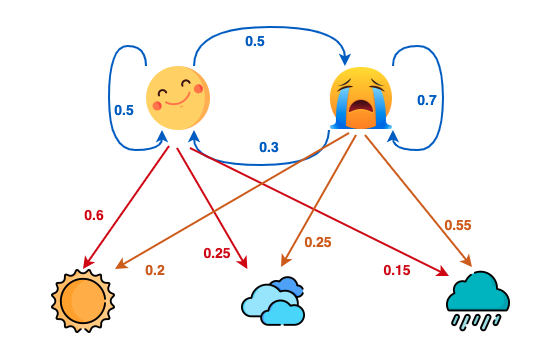

## Question

Create a Hidden Markov Model to model this relationship and predict the most likely sequence of hidden states that generated the following observations:

`sunny, sunny, cloudy, cloudy, rainy, cloudy, sunny, rainy, sunny, cloudy`

## Code

In [5]:
! pip install hmmlearn

In [7]:
import numpy as np
from hmmlearn import hmm

# Define the states and observations
states = ["cheerful", "stress"]
n_states = len(states)

observations = ["sunny", "cloudy", "rainy"]
n_observations = len(observations)

# Mapping observations to integers
obs_map = {obs: i for i, obs in enumerate(observations)}

# Start probabilities
start_probability = np.array([0.7, 0.3]) # Cheerful, Stress

# Transition matrix
transition_probability = np.array([
  [0.8, 0.2],  # Cheerful -> Cheerful, Cheerful -> Stress
  [0.3, 0.7]   # Stress -> Cheerful, Stress -> Stress
])

# Emission matrix
emission_probability = np.array([
  [0.7, 0.2, 0.1],  # P(sunny | cheerful), P(cloudy | cheerful), P(rainy | cheerful)
  [0.2, 0.4, 0.4]   # P(sunny | stress), P(cloudy | stress), P(rainy | stress)
])

# Create the HMM model --> THAY ĐỔI Ở ĐÂY
model = hmm.CategoricalHMM(n_components=n_states, n_iter=100) # Sử dụng CategoricalHMM
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Observation sequence
obs_seq_str = "sunny, sunny, cloudy, cloudy, rainy, cloudy, sunny, rainy, sunny, cloudy".split(', ')
obs_seq = np.array([obs_map[obs] for obs in obs_seq_str]).reshape(-1, 1)

# Predict the most likely sequence of hidden states
hidden_states = model.predict(obs_seq)

# Print the results
print("Observation sequence:")
print(obs_seq_str)

print("\nMost likely hidden state sequence:")
predicted_states = [states[s] for s in hidden_states]
print(predicted_states)

Observation sequence:
['sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'rainy', 'sunny', 'cloudy']

Most likely hidden state sequence:
['cheerful', 'cheerful', 'stress', 'stress', 'stress', 'stress', 'stress', 'stress', 'stress', 'stress']
